In [42]:
# 1. Import the required libraries.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [43]:
#2. Import the data set 
row_data= pd.read_csv(r"C:\Users\Anu\Downloads\german_credit_data.csv")

In [44]:
data= row_data.copy()

In [45]:
# 3. Show what the data looks like, by displaying  the first ten and last ten rows.
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [46]:
data.tail(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
990,990,37,male,1,own,NaN,NaN,3565,12,education
991,991,34,male,1,own,moderate,NaN,1569,15,radio/TV
992,992,23,male,1,rent,NaN,little,1936,18,radio/TV
993,993,30,male,3,own,little,little,3959,36,furniture/equipment
994,994,50,male,2,own,NaN,NaN,2390,12,car
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [47]:
# 4. Interpret the mean, min, max, std of the dataset.

data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [48]:
# 5. What is the size and shape data?
data.shape

(1000, 10)

In [49]:
#6 Give the datatypes of each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [50]:
#7 Are there any NA values in the dataset?
data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [51]:
na_percntage=data.isna().sum()/data.shape[0]*100

In [52]:
na_percntage


Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

In [54]:
# Replace the na with mode(categorical columns)

data['Saving accounts'].mode()

0    little
dtype: object

In [55]:
data['Saving accounts'].fillna(data['Saving accounts'].mode().values[0],inplace= True)

In [56]:
data['Checking account'].mode()

0    little
dtype: object

In [57]:
data['Checking account'].fillna(data['Checking account'].mode().values[0],inplace= True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [67]:
# here we can see that job should be a categorical column

data['Job']= data['Job'].astype('object')

In [68]:
#8 Is there any categorical data in the dataset?

cat_col= ['object']


In [69]:
categorical_data= data.describe( include= cat_col)

In [70]:
categorical_data

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,1000,1000,1000,1000
unique,2,4,3,4,3,8
top,male,2,own,little,little,car
freq,690,630,713,786,668,337


In [71]:
# 9. It is also important to understand the data feature by feature, find out what different range of values each feature takes and count of it?
data.describe()

,Unnamed: 0,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,3271.258000,20.903000
std,288.819436,11.375469,2822.736876,12.058814
min,0.000000,19.000000,250.000000,4.000000
25%,249.750000,27.000000,1365.500000,12.000000
50%,499.500000,33.000000,2319.500000,18.000000
75%,749.250000,42.000000,3972.250000,24.000000
max,999.000000,75.000000,18424.000000,72.000000


In [73]:
age_range= data['Age'].max()- data['Age'].min()
age_range

56

In [74]:
credit_amount_range= data['Credit amount'].max()- data['Credit amount'].min()
credit_amount_range

18174

In [75]:
credit_amount_range= data['Duration'].max()- data['Duration'].min()
credit_amount_range

68

In [77]:
import seaborn as ans

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   object
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [97]:
data['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

C:\Users\Anu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

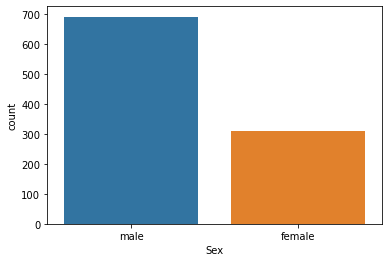

In [78]:
ans.countplot(data['Sex'])

In [79]:
data['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

C:\Users\Anu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Housing', ylabel='count'>

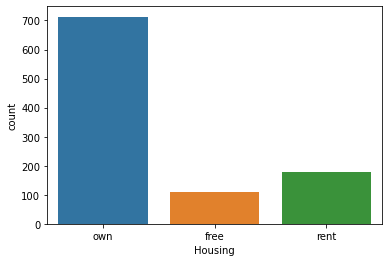

In [40]:
ans.countplot(data['Housing'])

In [81]:
data['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

C:\Users\Anu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Job', ylabel='count'>

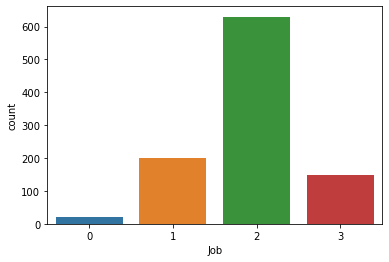

In [83]:
ans.countplot(data['Job'])

In [92]:
pd.crosstab(data['Job'], data['Sex'])

Sex,female,male
Job,,
0,12,10
1,64,136
2,197,433
3,37,111


In [84]:
data['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

C:\Users\Anu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

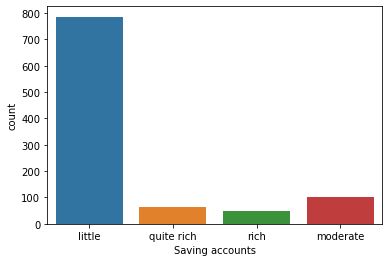

In [85]:
ans.countplot(data['Saving accounts'])

In [86]:
data['Checking account'].value_counts()

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64

C:\Users\Anu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Checking account', ylabel='count'>

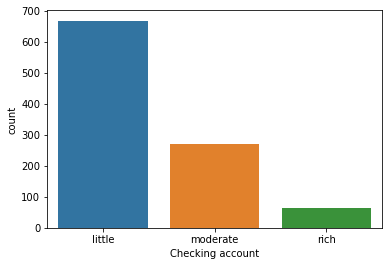

In [87]:
ans.countplot(data['Checking account'])

In [88]:
data['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

C:\Users\Anu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purpose', ylabel='count'>

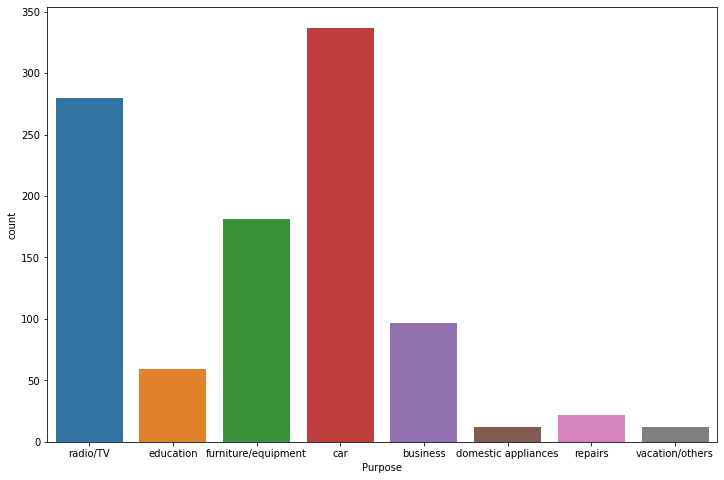

In [90]:
plt.figure(figsize=(12,8))
ans.countplot(data['Purpose'])

In [93]:
# 10. Can you rename some columns with some meaningful names, also drop the one’s irrelevant? 
data.drop("Unnamed: 0",axis=1,inplace= True)

In [94]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [95]:
data.rename(columns=({'Saving accounts':'Savings_account','Credit amount':'Credit_amount','Job':'Job_type'}),inplace= True)

In [96]:
data

,Age,Sex,Job_type,Housing,Savings_account,Checking account,Credit_amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,little,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
